### Imports

In [1]:
from definitions import *
import sys
sys.path.append("../../llama/llama/")
from tokenizer import Tokenizer

### Experiment with Llama 2 tokenizer

In [3]:
tokenizer = Tokenizer("../../llama/tokenizer.model")

In [5]:
tokenizer.encode("hello, how are you doing?", bos=True, eos=True)

[1, 22172, 29892, 920, 526, 366, 2599, 29973, 2]

In [9]:
tokenizer.decode([1, 22172, 29892, 920, 526, 366, 2599, 29973, 2])

'hello, how are you doing?'

In [10]:
tokenizer.encode("Привет, как дела?", bos=True, eos=True)

[1, 7203, 7616, 29892, 5413, 24280, 29973, 2]

In [11]:
tokenizer.decode([[1, 7203, 7616, 29892, 5413, 24280, 29973, 2]])

['Привет, как дела?']

In [16]:
num_tokens = 0
with open("../artifacts/book_full_texts/war_and_peace.txt", "r") as f:
    for x in tqdm(f.readlines(), desc="Iterating through war and peace lines"):
        num_tokens += len(tokenizer.encode(x, False, False))
print(num_tokens)

Iterating through war and peace lines: 100%|██████████| 24010/24010 [00:01<00:00, 20822.57it/s]

1456183


In [20]:
dir_path = Path("../artifacts/book_full_texts/")
book_to_tokens = dict()
for file in dir_path.glob("*.txt"):
    with open(file, "r") as f:
        num_tokens = len(tokenizer.encode(f.read(), False, False))
    book_to_tokens[file.stem] = num_tokens

In [82]:
with open("../artifacts/tokens/books/llama-2-7b.json", "w") as f:
    json.dump(book_to_tokens, f, indent=2, ensure_ascii=False)

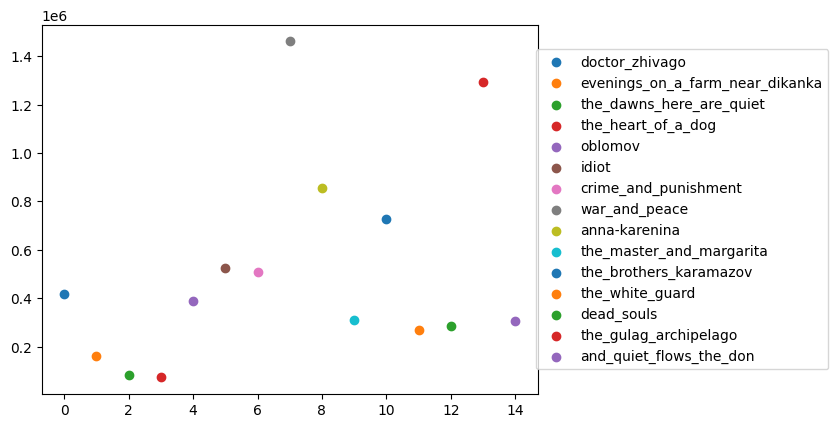

In [68]:
import matplotlib.pyplot as plt

for i, (book, num_tokens) in enumerate(book_to_tokens.items()):
    plt.scatter(i, num_tokens, label=book)
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5))

{'whiskers': [<matplotlib.lines.Line2D at 0x31f6ed610>,
 'caps': [<matplotlib.lines.Line2D at 0x31f6ee990>,
 'boxes': [<matplotlib.lines.Line2D at 0x31f6ece10>,
 'medians': [<matplotlib.lines.Line2D at 0x31f6ef910>,
 'fliers': [<matplotlib.lines.Line2D at 0x31f6f8290>,
 'means': []}

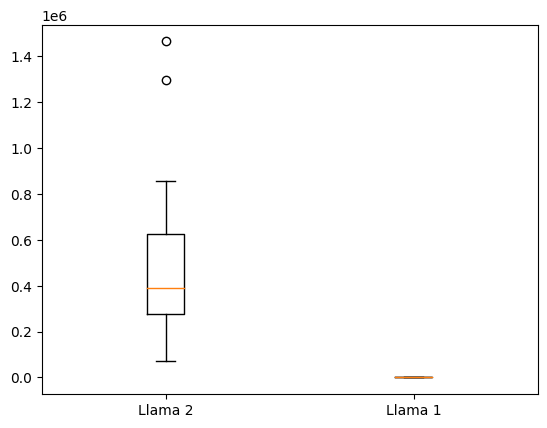

In [80]:
plt.boxplot([list(book_to_tokens.values()), [0, 1, 2]], labels=["Llama 2", "Llama 1"])

In [73]:
np.mean(list(book_to_tokens.values()))

510263.6666666667

### Experiment with Llama 3 tokenizer

In [1]:
from definitions import *
sys.path.append("../../llama3/llama")

In [2]:
from tokenizer import Tokenizer

In [6]:
tokenizer = Tokenizer("../../llama3/Meta-Llama-3-8B/tokenizer.model")

In [10]:
tokenizer.encode("Hi, how are you?", bos=False, eos=False)

[13347, 11, 1268, 527, 499, 30]

In [11]:
tokenizer.decode([13347, 11, 1268, 527, 499, 30])

'Hi, how are you?'

In [13]:
dir_path = Path("../artifacts/book_full_texts/")
book_to_tokens = dict()
for file in dir_path.glob("*.txt"):
    with open(file, "r") as f:
        num_tokens = len(tokenizer.encode(f.read(), bos=False, eos=False))
    book_to_tokens[file.stem] = num_tokens

In [14]:
with open("../artifacts/tokens/books/llama-3-8b.json", "w") as f:
    json.dump(book_to_tokens, f, indent=2, ensure_ascii=False)

### Bloom tokenizer

In [18]:
from transformers import BloomTokenizerFast

tokenizer = BloomTokenizerFast.from_pretrained("bigscience/bloom")
tokenizer("Hello world")["input_ids"]


None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


tokenizer_config.json:   0%|          | 0.00/222 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

[86153, 8876]

In [23]:
dir_path = Path("../artifacts/book_full_texts/")
book_to_tokens = dict()
for file in dir_path.glob("*.txt"):
    with open(file, "r") as f:
        num_tokens = len(tokenizer(f.read())["input_ids"])
    book_to_tokens[file.stem] = num_tokens
with open("../artifacts/tokens/books/bloom.json", "w") as f:
    json.dump(book_to_tokens, f, indent=2, ensure_ascii=False)

### Falcon

In [27]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("tiiuae/falcon-7b")

tokenizer_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

In [28]:
tokenizer("hi, how are you?")

{'input_ids': [5752, 23, 672, 362, 299, 42], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [29]:
dir_path = Path("../artifacts/book_full_texts/")
book_to_tokens = dict()
for file in dir_path.glob("*.txt"):
    with open(file, "r") as f:
        num_tokens = len(tokenizer(f.read())["input_ids"])
    book_to_tokens[file.stem] = num_tokens
with open("../artifacts/tokens/books/falcon-7b.json", "w") as f:
    json.dump(book_to_tokens, f, indent=2, ensure_ascii=False)

Token indices sequence length is longer than the specified maximum sequence length for this model (1016218 > 2048). Running this sequence through the model will result in indexing errors


### Common code for models from Hugging Face

In [36]:
from transformers import AutoTokenizer

model_to_repo = {
    "flan-t5-xxl": "google/flan-t5-xxl",
    "fred-t5-1.7b": "ai-forever/FRED-T5-1.7B",
    "phi": "microsoft/phi-2",
    "dolly-v2-7b": "databricks/dolly-v2-7b",
    "DeciLM-7b": "Deci/DeciLM-7B",
    "saiga_mistral_7b_lora": "IlyaGusev/saiga_mistral_7b_lora",
    "vicuna-7b": "lmsys/vicuna-7b-v1.5",
    "vikhr-7b": "Vikhrmodels/Vikhr-7b-0.1",
    "ru-longformer-large-4096": "kazzand/ru-longformer-large-4096",
}
dir_path = Path("../artifacts/book_full_texts/")

failed = []
for model, repo in tqdm(model_to_repo.items(), desc="Iterating through models"):
    try:
        tokenizer = AutoTokenizer.from_pretrained(repo)
        book_to_tokens = dict()
        for file in dir_path.glob("*.txt"):
            with open(file, "r") as f:
                num_tokens = len(tokenizer(f.read())["input_ids"])
            book_to_tokens[file.stem] = num_tokens
        with open(f"../artifacts/tokens/books/{model}.json", "w") as f:
            json.dump(book_to_tokens, f, indent=2, ensure_ascii=False)
    except Exception:
        failed.append(model)
print(f"failed: {failed}")

Iterating through models:   7%|▋         | 1/14 [00:19<04:16, 19.70s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Iterating through models:  36%|███▌      | 5/14 [00:38<00:39,  4.34s/it]

tokenizer_config.json:   0%|          | 0.00/237 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1124916 > 2048). Running this sequence through the model will result in indexing errors
Iterating through models:  43%|████▎     | 6/14 [01:07<01:41, 12.69s/it]

tokenizer_config.json:   0%|          | 0.00/237 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1124916 > 2048). Running this sequence through the model will result in indexing errors
Iterating through models:  50%|█████     | 7/14 [01:35<02:03, 17.63s/it]

tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Token indices sequence length is longer than the specified maximum sequence length for this model (1124916 > 2048). Running this sequence through the model will result in indexing errors
Iterating through models:  57%|█████▋    | 8/14 [02:04<02:06, 21.13s/it]

tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Iterating through models:  64%|██████▍   | 9/14 [02:27<01:49, 21.90s/it]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

Iterating through models:  71%|███████▏  | 10/14 [02:48<01:25, 21.46s/it]

tokenizer_config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/96.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Token indices sequence length is longer than the specified maximum sequence length for this model (444433 > 32768). Running this sequence through the model will result in indexing errors
Iterating through models:  79%|███████▊  | 11/14 [03:07<01:02, 20.70s/it]

tokenizer_config.json:   0%|          | 0.00/749 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (415518 > 4096). Running this sequence through the model will result in indexing errors
Iterating through models:  86%|████████▌ | 12/14 [03:24<00:39, 19.74s/it]

tokenizer_config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/672k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

Iterating through models:  93%|█████████▎| 13/14 [03:45<00:20, 20.08s/it]

tokenizer_config.json:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.71M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.93M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (257446 > 4096). Running this sequence through the model will result in indexing errors
Iterating through models: 100%|██████████| 14/14 [04:12<00:00, 18.03s/it]

failed: ['mistral-7b', 'mixtral-8x7b', 'gemma-7b']


### Deal with failed LLMs

In [8]:
from transformers import AutoTokenizer
from huggingface_hub import login
login(token=os.environ["HUGGING_FACE_ACCESS_TOKEN"], add_to_git_credential=True)

Token is valid (permission: read).
Your token has been saved in your configured git credential helpers (osxkeychain).
Your token has been saved to /Users/nvdenisov2002/.cache/huggingface/token
Login successful


In [9]:
model_to_repo_failed = {
    "mistral-7b": "mistralai/Mistral-7B-v0.1",
    "mixtral-8x7b": "mistralai/Mixtral-8x7B-v0.1",
    "gemma-7b": "google/gemma-7b",
}
dir_path = Path("../artifacts/book_full_texts/")

failed_again = []
for model, repo in tqdm(model_to_repo_failed.items(), desc="Iterating through models"):
    try:
        tokenizer = AutoTokenizer.from_pretrained(repo)
        book_to_tokens = dict()
        for file in dir_path.glob("*.txt"):
            with open(file, "r") as f:
                num_tokens = len(tokenizer(f.read())["input_ids"])
            book_to_tokens[file.stem] = num_tokens
        with open(f"../artifacts/tokens/books/{model}.json", "w") as f:
            json.dump(book_to_tokens, f, indent=2, ensure_ascii=False)
    except Exception as e:
        print(e)
        failed_again.append(model)
print(f"failed_again: {failed_again}")

Iterating through models:   0%|          | 0/3 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

Iterating through models:  33%|███▎      | 1/3 [00:21<00:42, 21.11s/it]

tokenizer_config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

Iterating through models:  67%|██████▋   | 2/3 [00:41<00:20, 20.88s/it]

tokenizer_config.json:   0%|          | 0.00/33.6k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

Iterating through models: 100%|██████████| 3/3 [01:17<00:00, 25.87s/it]

failed_again: []


### Combine different tokenizers

[ 8 13  4  1 10  6 11 12  9 14 15  7  2  0  5  3]
1339756.0 phi
1209823.9333333333 falcon-7b
936583.4666666667 flan-t5-xxl
663493.2666666667 dolly-v2-7b
613507.5333333333 bloom
547267.4666666667 DeciLM-7b
547267.4666666667 mixtral-8x7b
547267.4666666667 mistral-7b
547266.4666666667 saiga_mistral_7b_lora
510264.6666666667 vicuna-7b
510263.6666666667 llama-2-7b
427712.3333333333 llama-3-8b
416054.06666666665 vikhr-7b
386681.86666666664 gemma-7b
325458.13333333336 fred-t5-1.7b
318248.93333333335 ru-longformer-large-4096


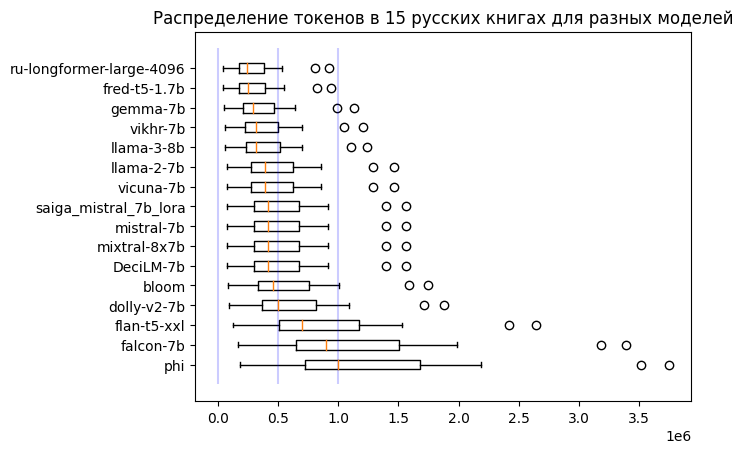

In [10]:
import matplotlib.pyplot as plt

values = []
labels = []
for file in Path("../artifacts/tokens/books/").glob("*"):
    labels.append(file.stem)
    with open(file, "r") as f:
        values.append(list(json.load(f).values()))
values = np.array(values)
labels = np.array(labels)
perm = range(len(values))
perm = sorted(perm, key=lambda i: -np.mean(values[i]))
perm = np.array(perm)
print(perm)
for p in perm:
    print(np.mean(values[p]), labels[p])
fig, ax = plt.subplots()
for position, column in enumerate(perm):
    ax.boxplot(values[column], positions=[position], vert=False, widths=0.5)
ax.set_yticks(range(position+1))
ax.set_yticklabels(labels[perm])
ax.vlines(np.array([0, 0.5, 1]) * 1e6, ymin=-1, ymax=len(labels), alpha=0.2, color='blue')
plt.title("Распределение токенов в 15 русских книгах для разных моделей")

plt.show()